In [1]:
import importlib
import fashionmnist_model as fmm_module  # Ensures clarity by matching the file name
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad
import matplotlib.pyplot as plt

# Reloads the module to ensure any changes are applied
importlib.reload(fmm_module)


<module 'fashionmnist_model' from '/Users/noah/Humber/Advanced-DL/Ad-DL-Midterm-Project/fashionmnist_model.py'>

In [2]:
X_train, y_train, X_test, y_test = fmm_module.FMM.load_data()
X_train, X_test = fmm_module.FMM.reshape_data(X_train, X_test)


In [3]:
optimizers = {
    'RMSprop': RMSprop,
    'Adam': Adam,
    'Adagrad': Adagrad
}
learning_rates = [0.001, 0.0005, 0.0001]
batch_sizes = [32, 64, 128]


In [4]:
best_val_accuracy = 0
best_params = {}
best_history = {}  # To store the history of the best model

for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"\nTraining with {opt_name}, LR: {lr}, Batch Size: {batch_size}")
            model = fmm_module.FMM.get_model()
            optimizer = opt_class(learning_rate=lr)
            history = fmm_module.FMM.compile_and_train(
                model, X_train, y_train, optimizer, batch_size=batch_size
            )
            

            loss, accuracy, train_accuracy, val_accuracy = fmm_module.FMM.evaluate(model, X_test, y_test, history)
            # Update best parameters if current model is better
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {
                    'optimizer': opt_name,
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'train_accuracy': train_accuracy,
                    'val_accuracy': val_accuracy
                }
                best_history = history  # Save the best history for plotting

            print(f"Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
            print("-" * 50)



Training with RMSprop, LR: 0.001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30


2024-02-23 09:11:21.662460: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 3s 1ms/step - loss: 0.5178 - accuracy: 0.8123 - val_loss: 0.4764 - val_accuracy: 0.8253
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3888 - accuracy: 0.8599 - val_loss: 0.3789 - val_accuracy: 0.8649
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8697 - val_loss: 0.4546 - val_accuracy: 0.8461
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.8768 - val_loss: 0.3941 - val_accuracy: 0.8667
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3399 - accuracy: 0.8800 - val_loss: 0.3820 - val_accuracy: 0.8702
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3291 - accuracy: 0.8854 - val_loss: 0.3942 - val_accuracy: 0.8822
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3256 - accuracy: 0.8875 - val_loss: 0.4119 - val_accuracy: 0.8647
Epo


Training accuracy : 0.9197916388511658
Validation accuracy : 0.8809999823570251
Loss : 0.8136222958564758
Accuracy : 0.8712999820709229

Train Accuracy: 0.9197916388511658, Validation Accuracy: 0.8809999823570251
--------------------------------------------------

Training with RMSprop, LR: 0.001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.8062 - val_loss: 0.4052 - val_accuracy: 0.8529
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8594 - val_loss: 0.3878 - val_accuracy: 0.8603
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8743 - val_loss: 0.3878 - val_accuracy: 0.8622
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8812 - val_loss: 0.3771 - val_accuracy: 0.8639
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3062 - a


Training accuracy : 0.9358333349227905
Validation accuracy : 0.8920000195503235
Loss : 0.5870239734649658
Accuracy : 0.8876000046730042

Train Accuracy: 0.9358333349227905, Validation Accuracy: 0.8920000195503235
--------------------------------------------------

Training with RMSprop, LR: 0.001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5938 - accuracy: 0.7899 - val_loss: 0.4128 - val_accuracy: 0.8499
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8535 - val_loss: 0.3924 - val_accuracy: 0.8521
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8696 - val_loss: 0.3858 - val_accuracy: 0.8611
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8792 - val_loss: 0.3426 - val_accuracy: 0.8794
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3039 - 


Training accuracy : 0.9480208158493042
Validation accuracy : 0.8911666870117188
Loss : 0.5228369832038879
Accuracy : 0.883400022983551

Train Accuracy: 0.9480208158493042, Validation Accuracy: 0.8911666870117188
--------------------------------------------------

Training with RMSprop, LR: 0.0005, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5239 - accuracy: 0.8143 - val_loss: 0.3884 - val_accuracy: 0.8554
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8628 - val_loss: 0.3665 - val_accuracy: 0.8662
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3441 - accuracy: 0.8753 - val_loss: 0.3758 - val_accuracy: 0.8623
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3219 - accuracy: 0.8835 - val_loss: 0.3520 - val_accuracy: 0.8777
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 


Training accuracy : 0.9331041574478149
Validation accuracy : 0.8884999752044678
Loss : 0.6642686724662781
Accuracy : 0.8830999732017517

Train Accuracy: 0.9331041574478149, Validation Accuracy: 0.8884999752044678
--------------------------------------------------

Training with RMSprop, LR: 0.0005, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.8058 - val_loss: 0.4615 - val_accuracy: 0.8263
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8615 - val_loss: 0.4425 - val_accuracy: 0.8369
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8739 - val_loss: 0.3463 - val_accuracy: 0.8769
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8827 - val_loss: 0.3334 - val_accuracy: 0.8798
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.2993 - 


Training accuracy : 0.9502916932106018
Validation accuracy : 0.8912500143051147
Loss : 0.5022756457328796
Accuracy : 0.8845000267028809

Train Accuracy: 0.9502916932106018, Validation Accuracy: 0.8912500143051147
--------------------------------------------------

Training with RMSprop, LR: 0.0005, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5979 - accuracy: 0.7912 - val_loss: 0.5228 - val_accuracy: 0.8053
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8496 - val_loss: 0.3841 - val_accuracy: 0.8635
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8652 - val_loss: 0.4181 - val_accuracy: 0.8428
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8754 - val_loss: 0.3696 - val_accuracy: 0.8675
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3184 -


Training accuracy : 0.9510416388511658
Validation accuracy : 0.8917499780654907
Loss : 0.3939184844493866
Accuracy : 0.8888999819755554

Train Accuracy: 0.9510416388511658, Validation Accuracy: 0.8917499780654907
--------------------------------------------------

Training with RMSprop, LR: 0.0001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6531 - accuracy: 0.7894 - val_loss: 0.4814 - val_accuracy: 0.8338
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4457 - accuracy: 0.8462 - val_loss: 0.4235 - val_accuracy: 0.8520
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4049 - accuracy: 0.8599 - val_loss: 0.3949 - val_accuracy: 0.8622
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8676 - val_loss: 0.3831 - val_accuracy: 0.8662
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss:


Training accuracy : 0.9289583563804626
Validation accuracy : 0.89083331823349
Loss : 0.3508061468601227
Accuracy : 0.885200023651123

Train Accuracy: 0.9289583563804626, Validation Accuracy: 0.89083331823349
--------------------------------------------------

Training with RMSprop, LR: 0.0001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.7473 - accuracy: 0.7650 - val_loss: 0.5234 - val_accuracy: 0.8224
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.8374 - val_loss: 0.4453 - val_accuracy: 0.8435
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4279 - accuracy: 0.8515 - val_loss: 0.4424 - val_accuracy: 0.8454
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4001 - accuracy: 0.8610 - val_loss: 0.4074 - val_accuracy: 0.8554
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3808 - accur


Training accuracy : 0.9206874966621399
Validation accuracy : 0.887666642665863
Loss : 0.34754419326782227
Accuracy : 0.8822000026702881

Train Accuracy: 0.9206874966621399, Validation Accuracy: 0.887666642665863
--------------------------------------------------

Training with RMSprop, LR: 0.0001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 0.8446 - accuracy: 0.7464 - val_loss: 0.5609 - val_accuracy: 0.8133
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5116 - accuracy: 0.8296 - val_loss: 0.4829 - val_accuracy: 0.8348
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4550 - accuracy: 0.8447 - val_loss: 0.4376 - val_accuracy: 0.8523
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.8548 - val_loss: 0.4244 - val_accuracy: 0.8505
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4040 - 


Training accuracy : 0.9097499847412109
Validation accuracy : 0.8890833258628845
Loss : 0.34039992094039917
Accuracy : 0.8787999749183655

Train Accuracy: 0.9097499847412109, Validation Accuracy: 0.8890833258628845
--------------------------------------------------

Training with Adam, LR: 0.001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5059 - accuracy: 0.8191 - val_loss: 0.4049 - val_accuracy: 0.8572
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3734 - accuracy: 0.8633 - val_loss: 0.3554 - val_accuracy: 0.8713
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8767 - val_loss: 0.3542 - val_accuracy: 0.8725
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3122 - accuracy: 0.8838 - val_loss: 0.3227 - val_accuracy: 0.8827
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.


Training accuracy : 0.9506666660308838
Validation accuracy : 0.8854166865348816
Loss : 0.4706507921218872
Accuracy : 0.8810999989509583

Train Accuracy: 0.9506666660308838, Validation Accuracy: 0.8854166865348816
--------------------------------------------------

Training with Adam, LR: 0.001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 1ms/step - loss: 0.5081 - accuracy: 0.8209 - val_loss: 0.4159 - val_accuracy: 0.8522
Epoch 2/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3699 - accuracy: 0.8664 - val_loss: 0.3526 - val_accuracy: 0.8699
Epoch 3/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3322 - accuracy: 0.8777 - val_loss: 0.3798 - val_accuracy: 0.8650
Epoch 4/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3077 - accuracy: 0.8860 - val_loss: 0.3331 - val_accuracy: 0.8800
Epoch 5/30
750/750 [==============================] - 1s 1ms/step - loss: 0.2877 - accu


Training accuracy : 0.9539166688919067
Validation accuracy : 0.8947499990463257
Loss : 0.4413725733757019
Accuracy : 0.8877000212669373

Train Accuracy: 0.9539166688919067, Validation Accuracy: 0.8947499990463257
--------------------------------------------------

Training with Adam, LR: 0.001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.8097 - val_loss: 0.4372 - val_accuracy: 0.8475
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8619 - val_loss: 0.3758 - val_accuracy: 0.8675
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8733 - val_loss: 0.3759 - val_accuracy: 0.8667
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8817 - val_loss: 0.3460 - val_accuracy: 0.8748
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3013 - acc


Training accuracy : 0.9526875019073486
Validation accuracy : 0.8895833492279053
Loss : 0.4304226040840149
Accuracy : 0.8853999972343445

Train Accuracy: 0.9526875019073486, Validation Accuracy: 0.8895833492279053
--------------------------------------------------

Training with Adam, LR: 0.0005, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5151 - accuracy: 0.8203 - val_loss: 0.4443 - val_accuracy: 0.8324
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8636 - val_loss: 0.3821 - val_accuracy: 0.8636
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3364 - accuracy: 0.8777 - val_loss: 0.3761 - val_accuracy: 0.8626
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8860 - val_loss: 0.3513 - val_accuracy: 0.8725
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.


Training accuracy : 0.9582499861717224
Validation accuracy : 0.8955000042915344
Loss : 0.4430149793624878
Accuracy : 0.8863999843597412

Train Accuracy: 0.9582499861717224, Validation Accuracy: 0.8955000042915344
--------------------------------------------------

Training with Adam, LR: 0.0005, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.8102 - val_loss: 0.4413 - val_accuracy: 0.8455
Epoch 2/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3899 - accuracy: 0.8606 - val_loss: 0.3833 - val_accuracy: 0.8582
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8732 - val_loss: 0.3447 - val_accuracy: 0.8780
Epoch 4/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8834 - val_loss: 0.3298 - val_accuracy: 0.8799
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3004 - acc


Training accuracy : 0.9565625190734863
Validation accuracy : 0.8919166922569275
Loss : 0.39716464281082153
Accuracy : 0.8894000053405762

Train Accuracy: 0.9565625190734863, Validation Accuracy: 0.8919166922569275
--------------------------------------------------

Training with Adam, LR: 0.0005, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5815 - accuracy: 0.8040 - val_loss: 0.4754 - val_accuracy: 0.8322
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8569 - val_loss: 0.4110 - val_accuracy: 0.8583
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8721 - val_loss: 0.3620 - val_accuracy: 0.8723
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8804 - val_loss: 0.3503 - val_accuracy: 0.8755
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.3160 - a


Training accuracy : 0.9517083168029785
Validation accuracy : 0.8951666951179504
Loss : 0.3782574236392975
Accuracy : 0.8855999708175659

Train Accuracy: 0.9517083168029785, Validation Accuracy: 0.8951666951179504
--------------------------------------------------

Training with Adam, LR: 0.0001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6493 - accuracy: 0.7865 - val_loss: 0.4760 - val_accuracy: 0.8393
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4373 - accuracy: 0.8495 - val_loss: 0.4277 - val_accuracy: 0.8485
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3953 - accuracy: 0.8620 - val_loss: 0.3951 - val_accuracy: 0.8611
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3691 - accuracy: 0.8706 - val_loss: 0.3848 - val_accuracy: 0.8626
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.


Training accuracy : 0.9372291564941406
Validation accuracy : 0.8886666893959045
Loss : 0.34916815161705017
Accuracy : 0.8826000094413757

Train Accuracy: 0.9372291564941406, Validation Accuracy: 0.8886666893959045
--------------------------------------------------

Training with Adam, LR: 0.0001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 2ms/step - loss: 0.7486 - accuracy: 0.7624 - val_loss: 0.5065 - val_accuracy: 0.8270
Epoch 2/30
750/750 [==============================] - 1s 1ms/step - loss: 0.4700 - accuracy: 0.8408 - val_loss: 0.4528 - val_accuracy: 0.8403
Epoch 3/30
750/750 [==============================] - 1s 1ms/step - loss: 0.4227 - accuracy: 0.8548 - val_loss: 0.4211 - val_accuracy: 0.8524
Epoch 4/30
750/750 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8627 - val_loss: 0.3939 - val_accuracy: 0.8638
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.3786 - ac


Training accuracy : 0.9235625267028809
Validation accuracy : 0.890250027179718
Loss : 0.33642086386680603
Accuracy : 0.8849999904632568

Train Accuracy: 0.9235625267028809, Validation Accuracy: 0.890250027179718
--------------------------------------------------

Training with Adam, LR: 0.0001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.9216 - accuracy: 0.7065 - val_loss: 0.5746 - val_accuracy: 0.8116
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.8264 - val_loss: 0.4857 - val_accuracy: 0.8331
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.8445 - val_loss: 0.4419 - val_accuracy: 0.8462
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8547 - val_loss: 0.4207 - val_accuracy: 0.8534
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4019 - acc


Training accuracy : 0.9124374985694885
Validation accuracy : 0.8870833516120911
Loss : 0.34218573570251465
Accuracy : 0.8797000050544739

Train Accuracy: 0.9124374985694885, Validation Accuracy: 0.8870833516120911
--------------------------------------------------

Training with Adagrad, LR: 0.001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1080 - accuracy: 0.6508 - val_loss: 0.7636 - val_accuracy: 0.7508
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7004 - accuracy: 0.7713 - val_loss: 0.6441 - val_accuracy: 0.7866
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6197 - accuracy: 0.7959 - val_loss: 0.5910 - val_accuracy: 0.8068
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5763 - accuracy: 0.8108 - val_loss: 0.5614 - val_accuracy: 0.8120
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss:


Training accuracy : 0.8622083067893982
Validation accuracy : 0.8550000190734863
Loss : 0.4408489763736725
Accuracy : 0.8465999960899353

Train Accuracy: 0.8622083067893982, Validation Accuracy: 0.8550000190734863
--------------------------------------------------

Training with Adagrad, LR: 0.001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 2ms/step - loss: 1.3718 - accuracy: 0.6010 - val_loss: 0.9537 - val_accuracy: 0.7027
Epoch 2/30
750/750 [==============================] - 1s 1ms/step - loss: 0.8423 - accuracy: 0.7330 - val_loss: 0.7548 - val_accuracy: 0.7583
Epoch 3/30
750/750 [==============================] - 1s 1ms/step - loss: 0.7146 - accuracy: 0.7712 - val_loss: 0.6744 - val_accuracy: 0.7832
Epoch 4/30
750/750 [==============================] - 1s 1ms/step - loss: 0.6511 - accuracy: 0.7930 - val_loss: 0.6272 - val_accuracy: 0.7970
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 0.6110 - a


Training accuracy : 0.8537708520889282
Validation accuracy : 0.8486666679382324
Loss : 0.46269291639328003
Accuracy : 0.8392999768257141

Train Accuracy: 0.8537708520889282, Validation Accuracy: 0.8486666679382324
--------------------------------------------------

Training with Adagrad, LR: 0.001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 1.6476 - accuracy: 0.5511 - val_loss: 1.1916 - val_accuracy: 0.6688
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 1.0291 - accuracy: 0.6931 - val_loss: 0.8980 - val_accuracy: 0.7228
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.8444 - accuracy: 0.7360 - val_loss: 0.7846 - val_accuracy: 0.7542
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.7579 - accuracy: 0.7607 - val_loss: 0.7220 - val_accuracy: 0.7708
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.7045 -


Training accuracy : 0.843500018119812
Validation accuracy : 0.8367499709129333
Loss : 0.4954470098018646
Accuracy : 0.828000009059906

Train Accuracy: 0.843500018119812, Validation Accuracy: 0.8367499709129333
--------------------------------------------------

Training with Adagrad, LR: 0.0005, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2905 - accuracy: 0.6480 - val_loss: 0.9124 - val_accuracy: 0.7246
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8300 - accuracy: 0.7380 - val_loss: 0.7608 - val_accuracy: 0.7590
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7310 - accuracy: 0.7673 - val_loss: 0.6941 - val_accuracy: 0.7780
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6787 - accuracy: 0.7836 - val_loss: 0.6552 - val_accuracy: 0.7872
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.


Training accuracy : 0.8447083234786987
Validation accuracy : 0.8385833501815796
Loss : 0.4925554096698761
Accuracy : 0.83160001039505

Train Accuracy: 0.8447083234786987, Validation Accuracy: 0.8385833501815796
--------------------------------------------------

Training with Adagrad, LR: 0.0005, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 1ms/step - loss: 1.7525 - accuracy: 0.5059 - val_loss: 1.3742 - val_accuracy: 0.6656
Epoch 2/30
750/750 [==============================] - 1s 1ms/step - loss: 1.1805 - accuracy: 0.6905 - val_loss: 1.0241 - val_accuracy: 0.7137
Epoch 3/30
750/750 [==============================] - 1s 1ms/step - loss: 0.9498 - accuracy: 0.7216 - val_loss: 0.8767 - val_accuracy: 0.7358
Epoch 4/30
750/750 [==============================] - 1s 1ms/step - loss: 0.8414 - accuracy: 0.7422 - val_loss: 0.7985 - val_accuracy: 0.7521
Epoch 5/30
750/750 [==============================] - 1s 1ms/step - loss: 0.7774 - ac


Training accuracy : 0.8347499966621399
Validation accuracy : 0.8293333053588867
Loss : 0.5257022380828857
Accuracy : 0.8210999965667725

Train Accuracy: 0.8347499966621399, Validation Accuracy: 0.8293333053588867
--------------------------------------------------

Training with Adagrad, LR: 0.0005, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 1.8790 - accuracy: 0.4060 - val_loss: 1.5689 - val_accuracy: 0.6123
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 1.3842 - accuracy: 0.6474 - val_loss: 1.2224 - val_accuracy: 0.6722
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 1.1326 - accuracy: 0.6827 - val_loss: 1.0404 - val_accuracy: 0.6999
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.9928 - accuracy: 0.7052 - val_loss: 0.9345 - val_accuracy: 0.7195
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.9067 -


Training accuracy : 0.8221874833106995
Validation accuracy : 0.8197500109672546
Loss : 0.5704092979431152
Accuracy : 0.8104000091552734

Train Accuracy: 0.8221874833106995, Validation Accuracy: 0.8197500109672546
--------------------------------------------------

Training with Adagrad, LR: 0.0001, Batch Size: 32
Training with model model_v1 ...
Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 2.0676 - accuracy: 0.3203 - val_loss: 1.8610 - val_accuracy: 0.4948
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7239 - accuracy: 0.5326 - val_loss: 1.5955 - val_accuracy: 0.5836
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5057 - accuracy: 0.6175 - val_loss: 1.4134 - val_accuracy: 0.6501
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 1.3543 - accuracy: 0.6536 - val_loss: 1.2857 - val_accuracy: 0.6683
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss:


Training accuracy : 0.7699166536331177
Validation accuracy : 0.7770000100135803
Loss : 0.7406971454620361
Accuracy : 0.762499988079071

Train Accuracy: 0.7699166536331177, Validation Accuracy: 0.7770000100135803
--------------------------------------------------

Training with Adagrad, LR: 0.0001, Batch Size: 64
Training with model model_v1 ...
Epoch 1/30
750/750 [==============================] - 1s 1ms/step - loss: 2.1846 - accuracy: 0.2117 - val_loss: 2.0055 - val_accuracy: 0.3618
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 1.8947 - accuracy: 0.4782 - val_loss: 1.7840 - val_accuracy: 0.5767
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 1.7008 - accuracy: 0.5974 - val_loss: 1.6146 - val_accuracy: 0.6191
Epoch 4/30
750/750 [==============================] - 1s 1ms/step - loss: 1.5525 - accuracy: 0.6261 - val_loss: 1.4823 - val_accuracy: 0.6417
Epoch 5/30
750/750 [==============================] - 1s 1ms/step - loss: 1.4360 - a


Training accuracy : 0.7583333253860474
Validation accuracy : 0.7598333358764648
Loss : 0.7905558347702026
Accuracy : 0.7522000074386597

Train Accuracy: 0.7583333253860474, Validation Accuracy: 0.7598333358764648
--------------------------------------------------

Training with Adagrad, LR: 0.0001, Batch Size: 128
Training with model model_v1 ...
Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 2.2350 - accuracy: 0.1635 - val_loss: 2.1173 - val_accuracy: 0.2829
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 2.0332 - accuracy: 0.3860 - val_loss: 1.9509 - val_accuracy: 0.4608
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 1.8902 - accuracy: 0.4903 - val_loss: 1.8242 - val_accuracy: 0.5300
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 1.7766 - accuracy: 0.5437 - val_loss: 1.7191 - val_accuracy: 0.5706
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 1.6794 -

In [5]:
print("Final Best Hyperparameters:")
print(f"Optimizer: {best_params['optimizer']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Training Accuracy: {best_params['train_accuracy']}")
print(f"Validation Accuracy: {best_params['val_accuracy']}")


Final Best Hyperparameters:
Optimizer: Adam
Learning Rate: 0.0005
Batch Size: 32
Training Accuracy: 0.9582499861717224
Validation Accuracy: 0.8955000042915344


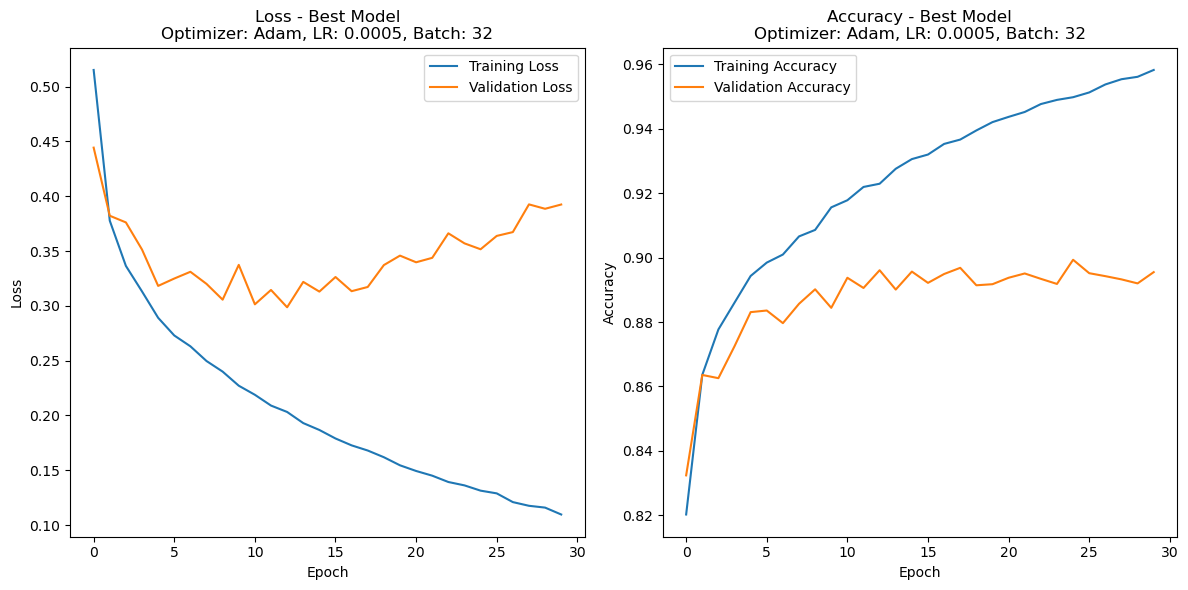

In [6]:
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss - Best Model\nOptimizer: {best_params["optimizer"]}, LR: {best_params["learning_rate"]}, Batch: {best_params["batch_size"]}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy - Best Model\nOptimizer: {best_params["optimizer"]}, LR: {best_params["learning_rate"]}, Batch: {best_params["batch_size"]}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
